<a href="https://www.kaggle.com/code/yarena/video-games-analysis?scriptVersionId=162225494" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Intro

Gaming market is making more money than Hollywood and it makes more than all North American sports combined. In this notebook, we'll take a closer look at global and regional gaming markets and find out some facts about it based on the Global Video Game Sales and Reviews dataset.
* Most popular genres each year globally
* Most popular genres each decade in regional and global market
* Most popular games of each year and decade worldwide
* Most successfull gaming platform worldwide and in different regions
* Most successfull publishers worldwide and in different regions

**Import Libraries**

First things first, import the necessary Python libraries for data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.  Data Preparation

Let's take a look at the dataset

In [2]:
data = pd.read_csv("/kaggle/input/global-video-game-sales-and-reviews/Video Games Sales.csv")
data.head(10)

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00
5,5,6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,10.85,8.87,6.48,2.88,29.08,90.00
6,6,7,Wii Play,Wii,2006.0,Misc,Nintendo,13.83,9.11,2.93,2.84,28.71,61.64
7,7,8,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,84.00
8,8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,13.35,6.48,4.66,2.25,26.75,88.18
9,9,10,Nintendogs,DS,2005.0,Simulation,Nintendo,9.02,10.81,1.93,2.73,24.50,85.00


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1907 non-null   int64  
 1   Rank           1907 non-null   int64  
 2   Game Title     1907 non-null   object 
 3   Platform       1907 non-null   object 
 4   Year           1878 non-null   float64
 5   Genre          1907 non-null   object 
 6   Publisher      1905 non-null   object 
 7   North America  1907 non-null   float64
 8   Europe         1907 non-null   float64
 9   Japan          1907 non-null   float64
 10  Rest of World  1907 non-null   float64
 11  Global         1907 non-null   float64
 12  Review         1907 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 193.8+ KB


First impressions of the dataset are
*      we don't need the column named index
*      there is around 30 missing values for the Year column. We can get rid of missing Year value rows since it's around 1.5% of the total number of rows of data. Same with the 2 missing values for Publisher
* Years are decimal numbers

In [4]:
data = data.drop(["index"], axis=1) # delete the index column

In [5]:
data = data.dropna(subset=["Year", "Publisher"]) # delete the rows with null values

In [6]:
data = data.astype({"Year": int})  # convert year from float to integer

In [7]:
# check the final state of the dataset after some data cleaning
data.info()
data

<class 'pandas.core.frame.DataFrame'>
Index: 1878 entries, 0 to 1906
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           1878 non-null   int64  
 1   Game Title     1878 non-null   object 
 2   Platform       1878 non-null   object 
 3   Year           1878 non-null   int64  
 4   Genre          1878 non-null   object 
 5   Publisher      1878 non-null   object 
 6   North America  1878 non-null   float64
 7   Europe         1878 non-null   float64
 8   Japan          1878 non-null   float64
 9   Rest of World  1878 non-null   float64
 10  Global         1878 non-null   float64
 11  Review         1878 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 190.7+ KB


,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,1,Wii Sports,Wii,2006,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1902,1903,Lizzie McGuire 2: Lizzie Diaries,GBA,2004,Action,Disney Interactive Studios,0.60,0.22,0.00,0.01,0.83,55.00
1903,1904,Xenoblade Chronicles,Wii,2010,Role-Playing,Nintendo,0.39,0.22,0.16,0.07,0.83,91.74
1904,1905,SingStar Abba,PS3,2008,Misc,Sony Computer Entertainment,0.25,0.44,0.00,0.14,0.83,73.00
1905,1906,FIFA Soccer World Championship,PS2,2000,Sports,Electronic Arts,0.27,0.21,0.28,0.07,0.83,73.00


* I want to add a decade column so that I can make analysis based on decades too. For that let's find the minimum and maximum values for the Year column

In [8]:
print("Start year: ", data["Year"].min(),"\nEnd year: ",data["Year"].max())

Start year:  1983 
End year:  2012


Then decades can be like
* 1983 - 1992
* 1993 - 2002
* 2003 - 2012

In [9]:
# define a simple function to put the game release year in the correct decade
def find_decade(row):
    if row["Year"] >= 1983 and row["Year"] <= 1992:
        return "1983-1992"
    if row["Year"] >= 1993 and row["Year"] <= 2002:
        return "1993-2002"
    if row["Year"] >= 2003 and row["Year"] <= 2012:
        return "2003-2012"

# apply the function to create a new column called Decade
data["Decade"] = data.apply(find_decade, axis=1)

# check the dataset
data.head()

,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review,Decade
0,1,Wii Sports,Wii,2006,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28,2003-2012
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00,1983-1992
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07,2003-2012
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65,2003-2012
4,5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00,1983-1992


* Let's check for duplications

In [10]:
# check if there's any duplicated games in the dataset
data["Game Title"].duplicated().sum()

373

* Let's take a closer look at the duplicates

In [11]:
data.loc[data["Game Title"].duplicated(), :]

,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review,Decade
31,32,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.46,4.70,0.47,2.02,12.65,88.10,2003-2012
33,34,Call of Duty: Black Ops,PS3,2010,Shooter,Activision,5.67,3.96,0.47,1.79,11.88,88.36,2003-2012
47,48,Call of Duty: Modern Warfare 2,PS3,2009,Shooter,Activision,4.85,3.36,0.38,1.53,10.12,93.42,2003-2012
50,51,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.19,3.67,0.44,1.56,9.86,82.57,2003-2012
53,54,Grand Theft Auto IV,PS3,2008,Action,Take-Two Interactive,4.39,3.38,0.39,1.50,9.66,91.00,2003-2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893,1894,GRID,X360,2008,Racing,Codemasters,0.32,0.41,0.01,0.09,0.84,86.54,2003-2012
1896,1897,DiRT,X360,2007,Racing,Codemasters,0.37,0.38,0.00,0.09,0.83,83.49,2003-2012
1901,1902,Medal of Honor: Warfighter,X360,2012,Shooter,Electronic Arts,0.42,0.32,0.01,0.09,0.83,68.00,2003-2012
1904,1905,SingStar Abba,PS3,2008,Misc,Sony Computer Entertainment,0.25,0.44,0.00,0.14,0.83,73.00,2003-2012


In [12]:
data.loc[data["Game Title"] == "Call of Duty: Modern Warfare 3", :]

,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review,Decade
25,26,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.23,4.09,0.12,1.43,14.87,88.49,2003-2012
31,32,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.46,4.70,0.47,2.02,12.65,88.10,2003-2012


In [13]:
data.loc[data["Game Title"] == "SingStar Abba", :]

,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review,Decade
1094,1095,SingStar Abba,PS2,2008,Misc,Sony Computer Entertainment,0.23,0.92,0.0,0.21,1.36,71.0,2003-2012
1904,1905,SingStar Abba,PS3,2008,Misc,Sony Computer Entertainment,0.25,0.44,0.0,0.14,0.83,73.0,2003-2012


It looks like some of the games are duplicated since they're released to different platforms with the same name and everything. 
* Let's check if there's any duplicates of Game Title and Platform too.

In [14]:
data.duplicated(subset = ["Game Title", "Platform"]).sum() 

0

This's a good sign! We don't have combined duplicates since we'll analyze game sales on different platforms later.

In [15]:
data.duplicated(subset = ["Game Title", "Year", "Genre", "Publisher"]).sum()

313

In [16]:
data.duplicated(subset = ["Game Title", "Year", "Genre"]).sum()

322

In [17]:
data.duplicated(subset = ["Game Title", "Genre", "Publisher"]).sum()

355

In [18]:
data.duplicated(subset = ["Game Title", "Genre"]).sum() == data["Game Title"].duplicated().sum()

True

It looks like duplicated games don't have different genres. However, the dataset shows that some of the duplicate games released to different platforms published in different years(around 50 of them) or published by different publisher(around 20 of them).

We don't really need to combine the duplicated values for different years and publishers because their number is really low.

* Let's check the sales numbers

In [19]:
regions_global_equal_number = ((data.loc[:, ["North America", "Europe", "Japan", "Rest of World"]].sum(axis=1) == data.loc[:, "Global"])*1).sum()
print("Number of global sales eqaul to the sum of regional sales: ", regions_global_equal_number,
      "\nPercetage wise: ", 100*regions_global_equal_number/data.shape[0],"%")

Number of global sales eqaul to the sum of regional sales:  847 
Percetage wise:  45.101171458998934 %


Due to number rolling there is an inconsistency with the summation of regional sales vs global sales. For consistancy let's update the global sales column.

In [20]:
data["global_updated"] = data.apply(lambda row: row["North America"]+row["Europe"]+row["Japan"]+row["Rest of World"], axis=1)
data.head()

,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review,Decade,global_updated
0,1,Wii Sports,Wii,2006,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28,2003-2012,81.13
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00,1983-1992,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07,2003-2012,33.56
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65,2003-2012,31.52
4,5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00,1983-1992,30.26


# 2. Answering questions

**1. Most popular genre of each year**

In [21]:
#pick a column related with sales and pick a geographical regional to get the most sold ones in years or decade
def grouped_max_func(time, column, region):
    summed_region = data.groupby(by=[time, column], as_index=False).agg({region:"sum"}).reset_index(drop=["index"]).sort_values(time)
    idxmax_region = summed_region.groupby(time)[region].idxmax()
    grouped_max_region = summed_region.loc[idxmax_region]
    return grouped_max_region

In [22]:
unique_genre = data["Genre"].unique()
print(unique_genre)

# use color blind palette for accessibility
color_blind_palette = ["#DC267F", "#785EF0", "#380721", "#FE6100", "#FFB000", "#2E03E5", 
                       "#2E8766", "#95ABAC", "#65B925", "#906A42", "#C4D537", "#344A52"]
genre_palette = dict(zip(unique_genre, color_blind_palette))

['Sports' 'Platform' 'Racing' 'Puzzle' 'Misc' 'Shooter' 'Simulation'
 'Role-Playing' 'Action' 'Fighting' 'Adventure' 'Strategy']


In [23]:
popular_genre_year_glob = grouped_max_func("Year", "Genre", "global_updated")
popular_genre_year_glob

,Year,Genre,global_updated
1,1983,Platform,5.62
6,1984,Shooter,30.85
10,1985,Platform,41.74
14,1986,Adventure,9.23
20,1987,Fighting,5.42
24,1988,Platform,27.73
29,1989,Puzzle,37.54
34,1990,Platform,22.93
40,1991,Adventure,6.37
51,1992,Platform,23.54


Text(0.5, 0.9, 'Most Popular Genre Each Year Worldwide')

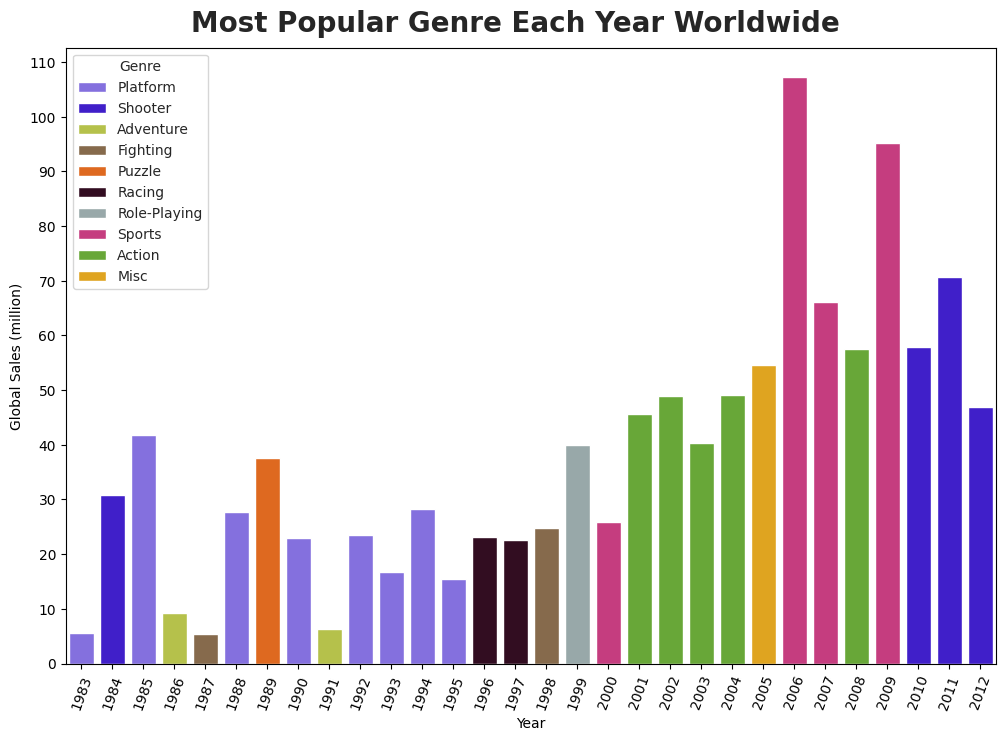

In [24]:
plt.subplots(1,1, figsize = (12, 8))
sns.set_style("whitegrid", {'grid.linestyle': ':'})
sns.barplot(data=popular_genre_year_glob, x="Year", y="global_updated", hue="Genre", palette=genre_palette, dodge = False)
plt.xticks(rotation=70)
plt.yticks(np.arange(0, popular_genre_year_glob["global_updated"].max()+10, 10))
plt.ylabel("Global Sales (million)")
plt.figtext(.5,.9,"Most Popular Genre Each Year Worldwide", 
            fontsize=20, fontweight='bold', fontname='helvetica', ha='center') 

**2.  Most popular genres each decade in regional and global market**

In [25]:
popular_genre_decade_japan = grouped_max_func("Decade","Genre", "Japan")
popular_genre_decade_row = grouped_max_func("Decade","Genre", "Rest of World")
popular_genre_decade_eu = grouped_max_func("Decade","Genre", "Europe")
popular_genre_decade_na = grouped_max_func("Decade","Genre", "North America")
popular_genre_decade_global = grouped_max_func("Decade","Genre", "global_updated")

print("Global\n", popular_genre_decade_global,
      "\nNorth America\n", popular_genre_decade_na,
      "\nEUROPE\n", popular_genre_decade_eu,
      "\nJAPAN\n", popular_genre_decade_japan,
      "\nREST OF WORLD\n", popular_genre_decade_row)

Global
        Decade     Genre  global_updated
4   1983-1992  Platform          155.48
15  1993-2002  Platform          197.20
33  2003-2012    Sports          514.51 
North America
        Decade     Genre  North America
4   1983-1992  Platform          92.01
15  1993-2002  Platform         106.07
33  2003-2012    Sports         249.15 
EUROPE
        Decade     Genre  Europe
4   1983-1992  Platform   21.54
11  1993-2002    Action   59.08
33  2003-2012    Sports  176.84 
JAPAN
        Decade         Genre  Japan
4   1983-1992      Platform  38.51
18  1993-2002  Role-Playing  66.60
30  2003-2012  Role-Playing  81.85 
REST OF WORLD
        Decade     Genre  Rest of World
4   1983-1992  Platform           3.42
11  1993-2002    Action          13.05
33  2003-2012    Sports          57.67


[Text(0, 0.5, 'Rest of the World Sales (million)'),
 Text(0.5, 1.0, 'Rest of the World'),

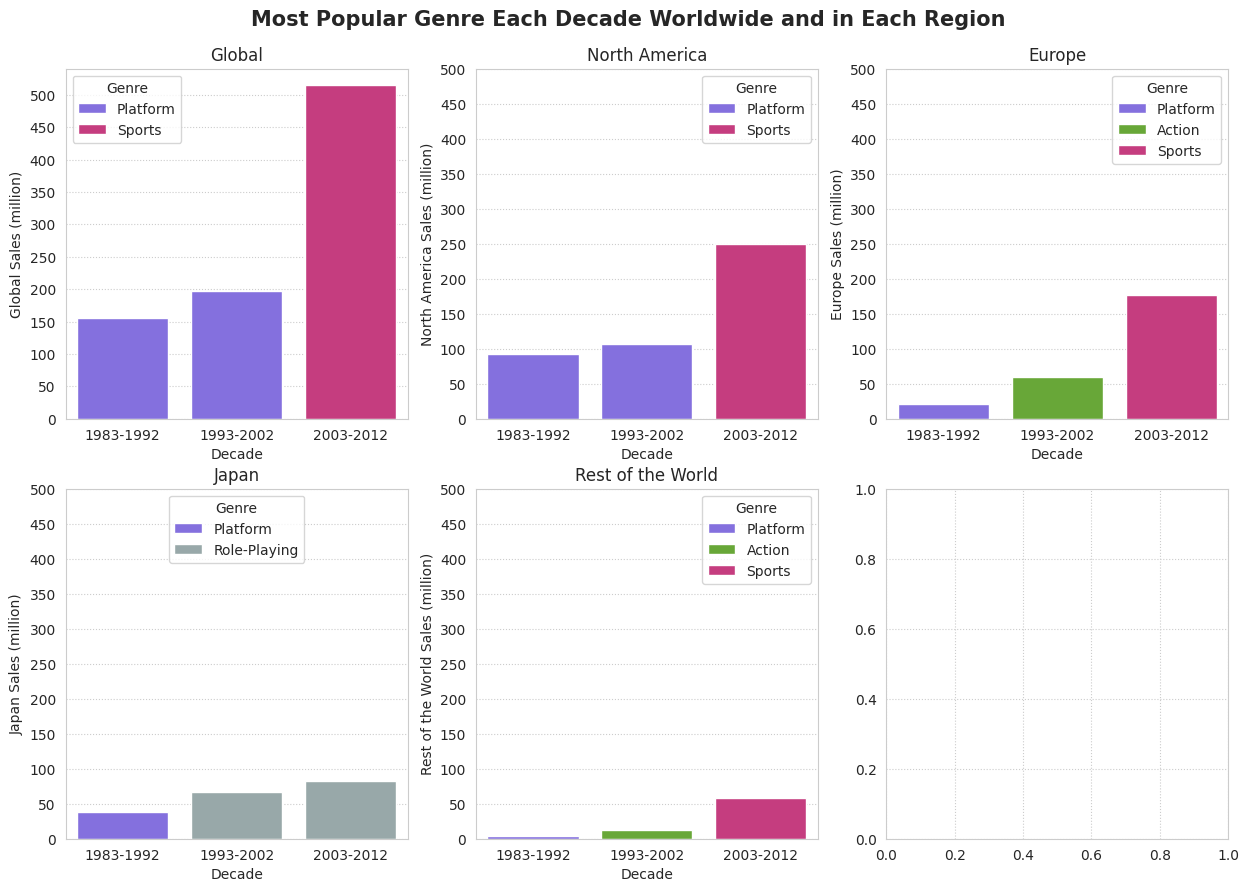

In [26]:
figure, axs = plt.subplots(nrows=2,ncols=3 ,figsize=(15,10))

plt.figtext(.5,.9,"Most Popular Genre Each Decade Worldwide and in Each Region\n", 
            fontsize=15, fontweight='bold', fontname='helvetica', ha='center') 
glob_decade = sns.barplot(data=popular_genre_decade_global, x="Decade", y="global_updated", hue="Genre", palette=genre_palette, dodge = False, ax=axs[0][0])
glob_decade.set(ylabel = "Global Sales (million)", title="Global", yticks = np.arange(0, popular_genre_decade_global["global_updated"].max()+10, 50))

na_decade = sns.barplot(data=popular_genre_decade_na, x="Decade", y="North America", hue="Genre", palette=genre_palette, dodge = False, ax=axs[0][1])
na_decade.set(ylabel = "North America Sales (million)", title="North America", yticks = np.arange(0, popular_genre_decade_global["global_updated"].max()+10, 50))

eu_decade = sns.barplot(data=popular_genre_decade_eu, x="Decade", y="Europe", hue="Genre", palette=genre_palette, dodge = False, ax=axs[0][2])
eu_decade.set(ylabel = "Europe Sales (million)", title="Europe", yticks = np.arange(0, popular_genre_decade_global["global_updated"].max()+10, 50))

jpn_decade = sns.barplot(data=popular_genre_decade_japan, x="Decade", y="Japan", hue="Genre", palette=genre_palette, dodge = False, ax=axs[1][0])
jpn_decade.set(ylabel = "Japan Sales (million)", title="Japan", yticks = np.arange(0, popular_genre_decade_global["global_updated"].max()+10, 50))

row_decade = sns.barplot(data=popular_genre_decade_row, x="Decade", y="Rest of World", hue="Genre", palette=genre_palette, dodge = False, ax=axs[1][1])
row_decade.set(ylabel = "Rest of the World Sales (million)", title="Rest of the World", yticks = np.arange(0, popular_genre_decade_global["global_updated"].max()+10, 50))

Over the 3 decades the world and regions are following a similar trend other than Japan. Role-Playing games are the popular choice the last two decades in Japan.

**3. Most popular games of each year and decade worldwide**

In [27]:
# use the grouped_max_func to find the most sold game title in the globe every year
popular_game_yearly_global = grouped_max_func("Year","Game Title", "global_updated")
popular_game_yearly_global

,Year,Game Title,global_updated
0,1983,Baseball,3.20
6,1984,Duck Hunt,28.31
19,1985,Super Mario Bros.,40.24
31,1986,The Legend of Zelda,6.50
39,1987,Zelda II: The Adventure of Link,4.38
47,1988,Super Mario Bros. 3,17.28
56,1989,Tetris,30.26
70,1990,Super Mario World,20.62
79,1991,The Legend of Zelda: A Link to the Past,4.61
94,1992,Super Mario Land 2: 6 Golden Coins,11.18


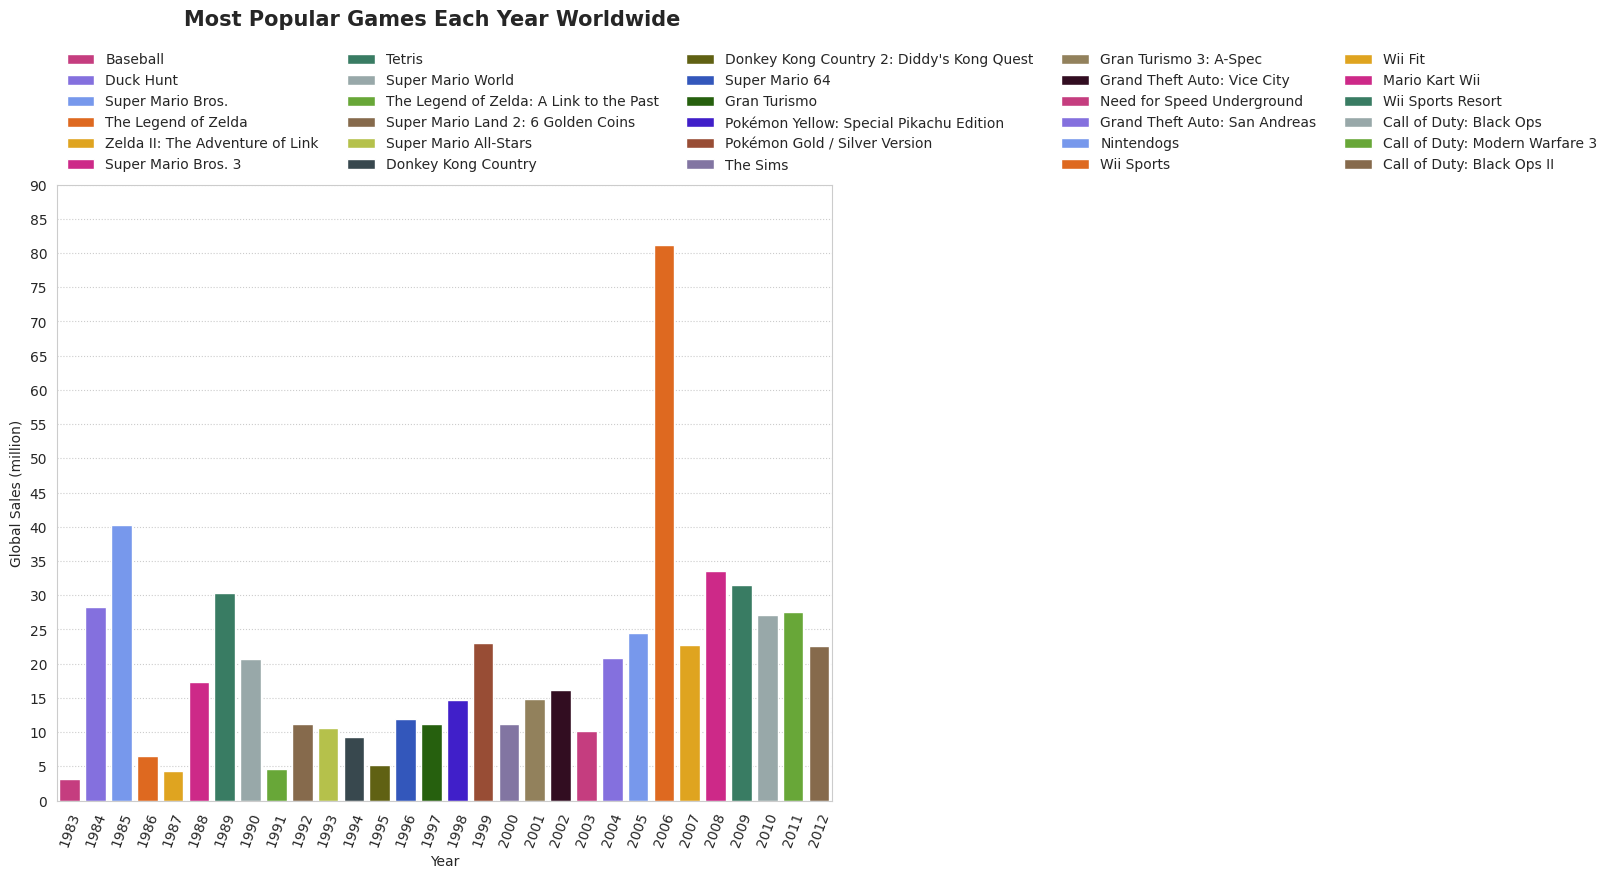

In [28]:
cb_palette = ["#DC267F", "#785EF0", "#648FFF", "#FE6100", "#FFB000", "#E80E8D", "#2E8766", 
                       "#95ABAC", "#65B925", "#906A42", "#C4D537", "#344A52", "#6C6E06", "#1C4DD2", 
                       "#216E00", "#2E03E5", "#A94424", "#7F6EA9", "#9B8453", "#380721"]
plt.figtext(.5,1.05,"Most Popular Games Each Year Worldwide\n", 
            fontsize=15, fontweight='bold', fontname='helvetica', ha='center') 
glob_yearly_game = sns.barplot(data=popular_game_yearly_global, x="Year", y="global_updated", hue="Game Title", palette=cb_palette, dodge = False)
glob_yearly_game.set(ylabel = "Global Sales (million)", yticks = np.arange(0, popular_game_yearly_global["global_updated"].max()+10, 5))
plt.xticks(rotation=70)
glob_yearly_game.figure.set_size_inches(10,8)
sns.move_legend(glob_yearly_game, "lower center", bbox_to_anchor=(1, 1), ncol=5, title=None, frameon=False)

Wii Sports sales is significantly high and it explains why there are huge sales of sports games during 2003-2012.

In [29]:
# use the grouped_max_func to find the most sold game title in the globe each decade
popular_game_decade_global = grouped_max_func("Decade","Game Title", "global_updated")

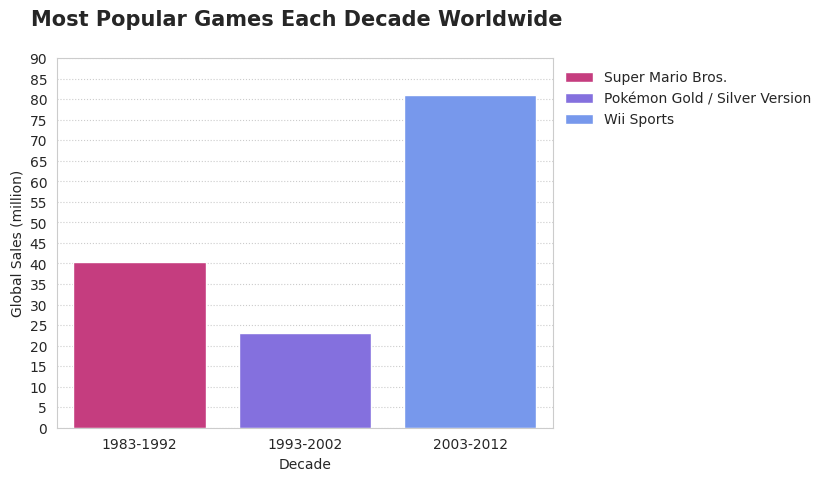

In [30]:
plt.figtext(.5,.9,"Most Popular Games Each Decade Worldwide\n", 
            fontsize=15, fontweight='bold', fontname='helvetica', ha='center') 
glob_decade_game = sns.barplot(data=popular_game_decade_global, x="Decade", y="global_updated", hue="Game Title", palette=cb_palette, dodge = False)
glob_decade_game.set(ylabel = "Global Sales (million)", yticks = np.arange(0, popular_game_decade_global["global_updated"].max()+10, 5))
sns.move_legend(glob_decade_game, "upper left", bbox_to_anchor=(1, 1), title=None, frameon=False)

Even though the most popular genre of games during 1993-2002 is platform, Pokémon Gold / Silver Version is the most popular game in that decade as a role-playing game.

**4. Most successful gaming platform worldwide and in different regions**

Let's first answer this question by looking at the most successful platform of each year based on global sales only.

In [31]:
# use the grouped_max_func to find the most successful platform each year globally 
successful_platform_yearly_global = grouped_max_func("Year","Platform", "global_updated")
successful_platform_yearly_global

,Year,Platform,global_updated
0,1983,NES,10.96
1,1984,NES,45.65
2,1985,NES,49.57
3,1986,NES,27.17
4,1987,NES,17.06
6,1988,NES,40.77
7,1989,GB,60.09
12,1990,SNES,26.15
16,1991,SNES,11.20
21,1992,SNES,25.57


In [32]:
unique_platform = data["Platform"].unique()
print(unique_platform)
platform_palette = dict(zip(unique_platform, cb_palette))

['Wii' 'NES' 'GB' 'DS' 'PS2' 'SNES' 'X360' 'GBA' 'PS3' 'N64' 'PC' 'PS'
 'XB' '3DS' 'PSP' 'GC' 'GEN' 'DC' 'SAT' 'WiiU' 'SCD' 'PSV']


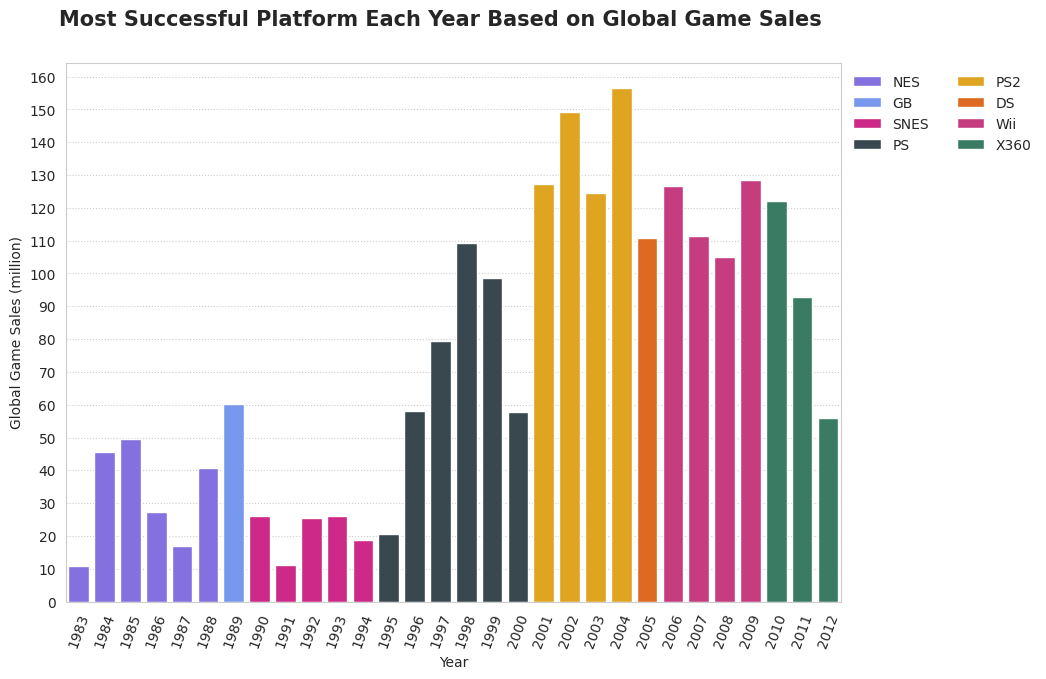

In [33]:
plt.figtext(.5,.9,"Most Successful Platform Each Year Based on Global Game Sales\n", 
            fontsize=15, fontweight='bold', fontname='helvetica', ha='center') 
glob_yearly_platform = sns.barplot(data=successful_platform_yearly_global, x="Year", y="global_updated", hue="Platform", palette=platform_palette, dodge = False)
glob_yearly_platform.set(ylabel = "Global Game Sales (million)", yticks = np.arange(0, successful_platform_yearly_global["global_updated"].max()+10, 10))
plt.xticks(rotation=70)
glob_yearly_platform.figure.set_size_inches(10,7)
sns.move_legend(glob_yearly_platform, "upper left", bbox_to_anchor=(1, 1), ncol=2, title=None, frameon=False)

Now let's look at the platform success each decade and regionally based on game sales in each region.

In [34]:
successful_platform_decade_global = grouped_max_func("Decade","Platform", "global_updated")
successful_platform_decade_na = grouped_max_func("Decade","Platform", "North America")
successful_platform_decade_jp = grouped_max_func("Decade","Platform", "Japan")
successful_platform_decade_eu = grouped_max_func("Decade","Platform", "Europe")
successful_platform_decade_rw = grouped_max_func("Decade","Platform", "Rest of World")

print("Global\n", successful_platform_decade_global,
      "\nNorth America\n", successful_platform_decade_na,
      "\nEUROPE\n", successful_platform_decade_eu,
      "\nJAPAN\n", successful_platform_decade_jp,
      "\nREST OF WORLD\n", successful_platform_decade_rw)

Global
        Decade Platform  global_updated
2   1983-1992      NES          211.38
13  1993-2002       PS          446.47
29  2003-2012      Wii          580.13 
North America
        Decade Platform  North America
2   1983-1992      NES         110.01
13  1993-2002       PS         222.95
31  2003-2012     X360         333.56 
EUROPE
        Decade Platform  Europe
2   1983-1992      NES   18.68
13  1993-2002       PS  136.05
29  2003-2012      Wii  188.64 
JAPAN
        Decade Platform   Japan
2   1983-1992      NES   79.29
13  1993-2002       PS   64.41
20  2003-2012       DS  106.48 
REST OF WORLD
        Decade Platform  Rest of World
2   1983-1992      NES           3.40
14  1993-2002      PS2          30.61
26  2003-2012      PS3          67.61


[Text(0, 0.5, 'Rest of the World Game Sales (million)'),
 Text(0.5, 1.0, 'Rest of the World'),

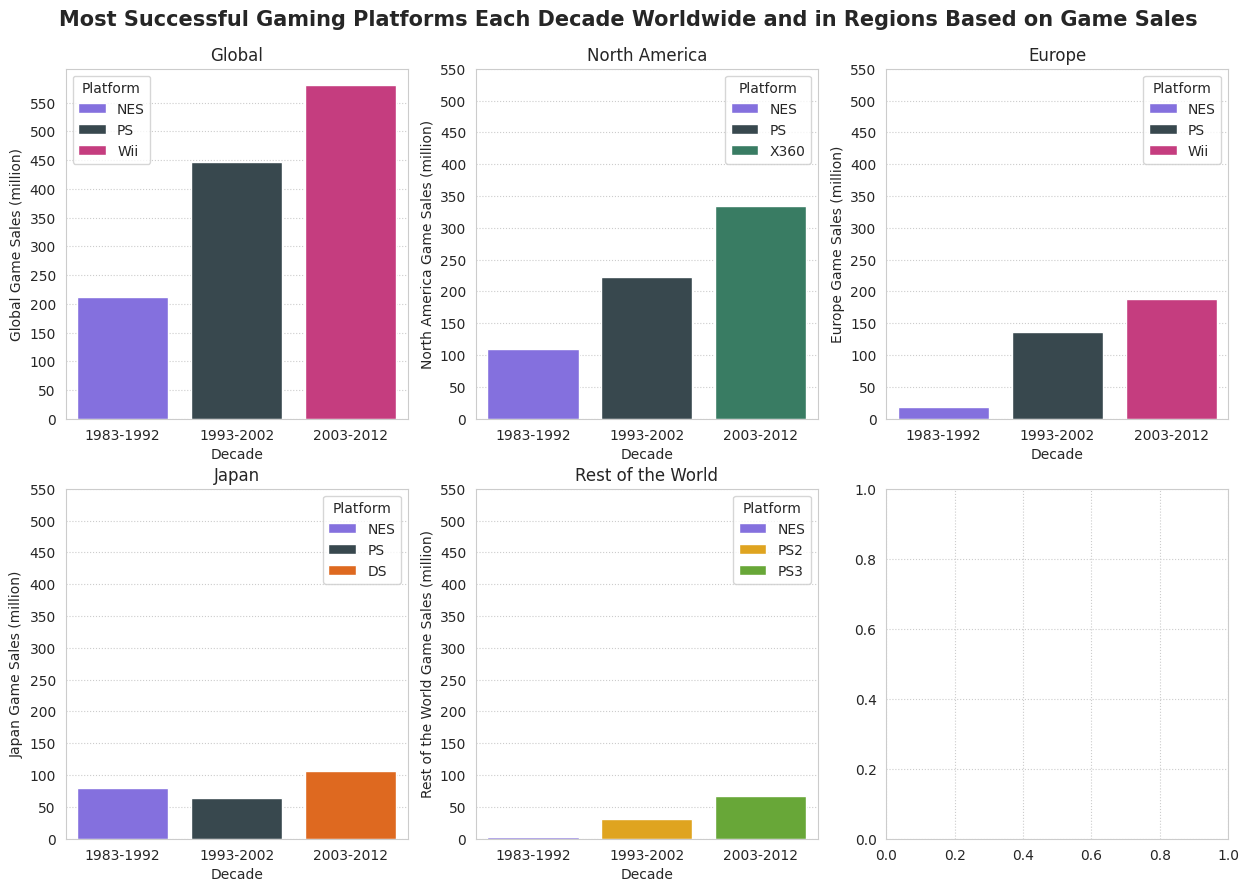

In [35]:
figure, axs = plt.subplots(nrows=2,ncols=3 ,figsize=(15,10))

plt.figtext(.5,.9,"Most Successful Gaming Platforms Each Decade Worldwide and in Regions Based on Game Sales\n", 
            fontsize=15, fontweight='bold', fontname='helvetica', ha='center') 
glob_decade_platform = sns.barplot(data=successful_platform_decade_global, x="Decade", y="global_updated", hue="Platform", palette=platform_palette, dodge = False, ax=axs[0][0])
glob_decade_platform.set(ylabel = "Global Game Sales (million)", title="Global", yticks = np.arange(0, successful_platform_decade_global["global_updated"].max()+10, 50))

na_decade_platform = sns.barplot(data=successful_platform_decade_na, x="Decade", y="North America", hue="Platform", palette=platform_palette, dodge = False, ax=axs[0][1])
na_decade_platform.set(ylabel = "North America Game Sales (million)", title="North America", yticks = np.arange(0, successful_platform_decade_global["global_updated"].max()+10, 50))

eu_decade_platform = sns.barplot(data=successful_platform_decade_eu, x="Decade", y="Europe", hue="Platform", palette=platform_palette, dodge = False, ax=axs[0][2])
eu_decade_platform.set(ylabel = "Europe Game Sales (million)", title="Europe", yticks = np.arange(0, successful_platform_decade_global["global_updated"].max()+10, 50))

jpn_decade_platform = sns.barplot(data=successful_platform_decade_jp, x="Decade", y="Japan", hue="Platform", palette=platform_palette, dodge = False, ax=axs[1][0])
jpn_decade_platform.set(ylabel = "Japan Game Sales (million)", title="Japan", yticks = np.arange(0, successful_platform_decade_global["global_updated"].max()+10, 50))

row_decade_platform = sns.barplot(data=successful_platform_decade_rw, x="Decade", y="Rest of World", hue="Platform", palette=platform_palette, dodge = False, ax=axs[1][1])
row_decade_platform.set(ylabel = "Rest of the World Game Sales (million)", title="Rest of the World", yticks = np.arange(0, successful_platform_decade_global["global_updated"].max()+10, 50))

It is interesting that in North America more games sold on Xbox360 than Wii. Let's check if Wii is one of the top in North America.

In [36]:
data.groupby(by=["Decade", "Platform"], as_index=False).agg({"North America":"sum"}).reset_index(drop=["index"]).sort_values("North America", ascending=False).head()

,Decade,Platform,North America
31,2003-2012,X360,333.56
29,2003-2012,Wii,286.67
25,2003-2012,PS2,241.39
13,1993-2002,PS,222.95
26,2003-2012,PS3,189.90


Wii is the second most successful platform of the decade as expected.

**5. Most successfull publishers worldwide and in different regions**

Again first let's see how it looks globally each year.

In [37]:
# use the grouped_max_func to find the most successful publisher each year globally 
successful_publisher_yearly_global = grouped_max_func("Year","Publisher", "global_updated")
successful_publisher_yearly_global

,Year,Publisher,global_updated
0,1983,Nintendo,10.96
3,1984,Nintendo,43.28
5,1985,Nintendo,48.52
9,1986,Nintendo,17.60
12,1987,Nintendo,11.95
16,1988,Nintendo,34.30
19,1989,Nintendo,58.99
23,1990,Nintendo,35.47
27,1991,Nintendo,14.12
34,1992,Nintendo,38.08


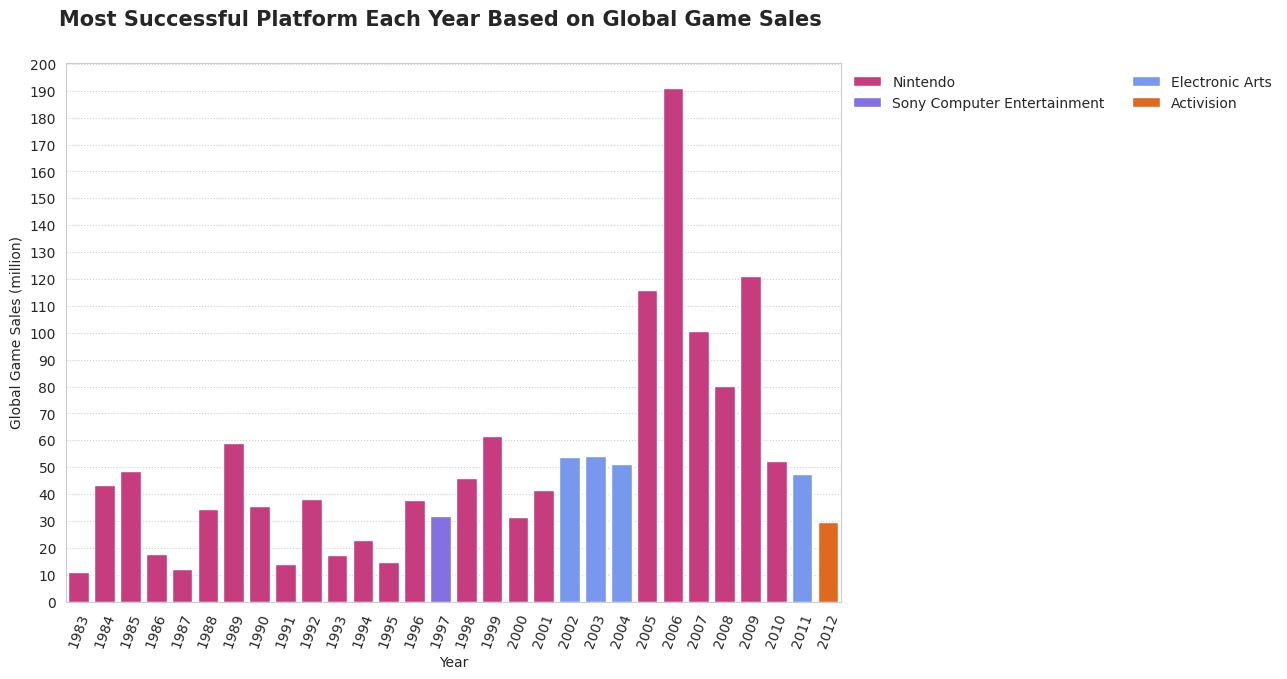

In [38]:
plt.figtext(.5,.9,"Most Successful Platform Each Year Based on Global Game Sales\n", 
            fontsize=15, fontweight='bold', fontname='helvetica', ha='center') 
glob_yearly_publisher = sns.barplot(data=successful_publisher_yearly_global, x="Year", y="global_updated", hue="Publisher",palette=cb_palette, dodge = False)
glob_yearly_publisher.set(ylabel = "Global Game Sales (million)", yticks = np.arange(0, successful_publisher_yearly_global["global_updated"].max()+10, 10))
plt.xticks(rotation=70)
glob_yearly_publisher.figure.set_size_inches(10,7)
sns.move_legend(glob_yearly_publisher, "upper left", bbox_to_anchor=(1, 1), ncol=2, title=None, frameon=False)

We can still see the success of Nintendo Wii and Wii Sports in this graph. We can also easily see Nintendo's dominance in the gaming market over the years and their big jump in 2006 with the huge success of Wii Sports.

It wouldn't be a surprise to see similar results from the regional sales each decade.

In [39]:
successful_publisher_decade_global = grouped_max_func("Decade","Publisher", "global_updated")
successful_publisher_decade_na = grouped_max_func("Decade","Publisher", "North America")
successful_publisher_decade_jp = grouped_max_func("Decade","Publisher", "Japan")
successful_publisher_decade_eu = grouped_max_func("Decade","Publisher", "Europe")
successful_publisher_decade_rw = grouped_max_func("Decade","Publisher", "Rest of World")

print("Global\n", successful_publisher_decade_global,
      "\nNorth America\n", successful_publisher_decade_na,
      "\nEUROPE\n", successful_publisher_decade_eu,
      "\nJAPAN\n", successful_publisher_decade_jp,
      "\nREST OF WORLD\n", successful_publisher_decade_rw)

Global
         Decade Publisher  global_updated
7    1983-1992  Nintendo          313.27
51   1993-2002  Nintendo          341.02
106  2003-2012  Nintendo          793.57 
North America
         Decade Publisher  North America
7    1983-1992  Nintendo         182.52
51   1993-2002  Nintendo         174.91
106  2003-2012  Nintendo         330.36 
EUROPE
         Decade Publisher  Europe
7    1983-1992  Nintendo   37.56
51   1993-2002  Nintendo   70.48
106  2003-2012  Nintendo  233.45 
JAPAN
         Decade Publisher   Japan
7    1983-1992  Nintendo   86.47
51   1993-2002  Nintendo   85.30
106  2003-2012  Nintendo  166.27 
REST OF WORLD
         Decade        Publisher  Rest of World
7    1983-1992         Nintendo           6.72
31   1993-2002  Electronic Arts          13.46
106  2003-2012         Nintendo          63.49


[Text(0, 0.5, 'Rest of the World Game Sales (million)'),
 Text(0.5, 1.0, 'Rest of the World'),

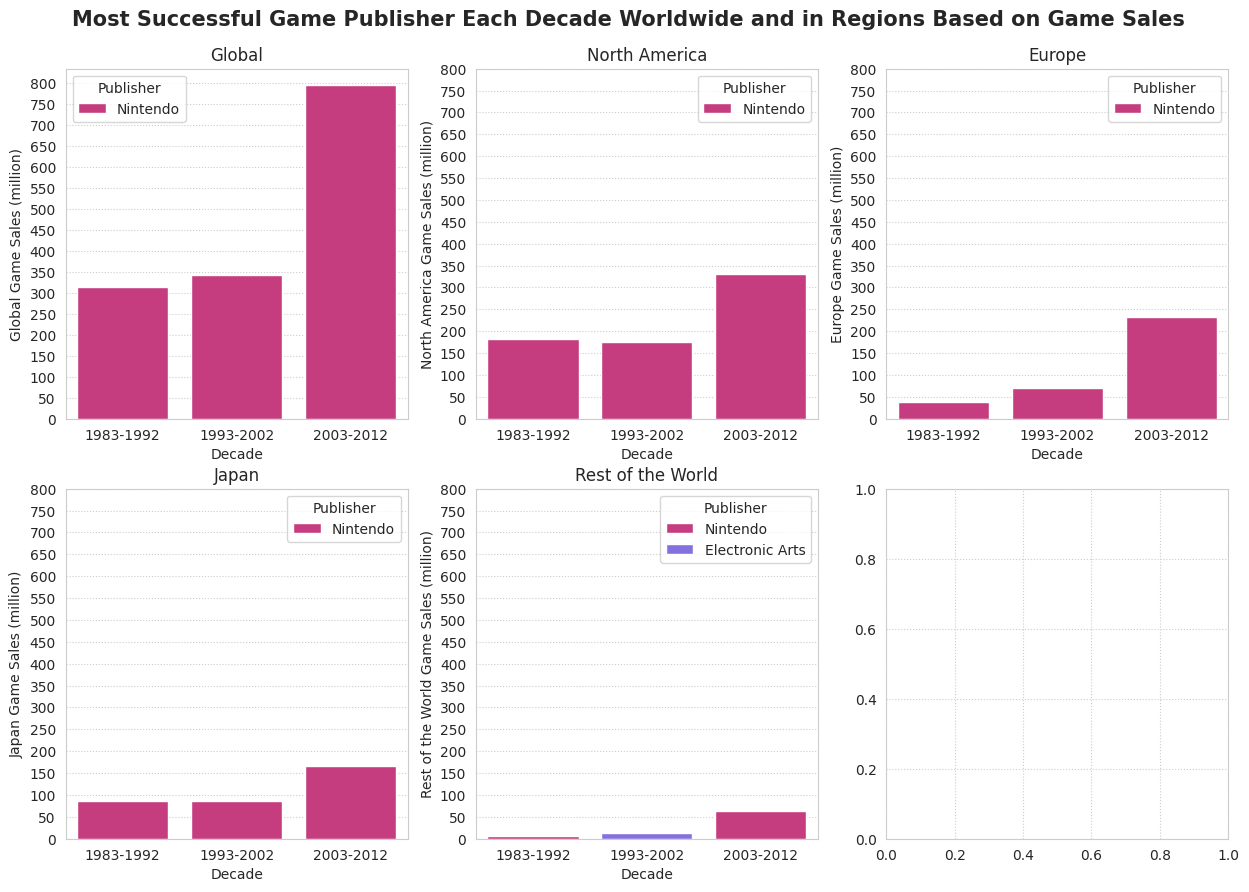

In [40]:
figure, axs = plt.subplots(nrows=2,ncols=3 ,figsize=(15,10))

plt.figtext(.5,.9,"Most Successful Game Publisher Each Decade Worldwide and in Regions Based on Game Sales\n", 
            fontsize=15, fontweight='bold', fontname='helvetica', ha='center') 
glob_decade_publisher = sns.barplot(data=successful_publisher_decade_global, x="Decade", y="global_updated", hue="Publisher", palette=cb_palette, dodge = False, ax=axs[0][0])
glob_decade_publisher.set(ylabel = "Global Game Sales (million)", title="Global", yticks = np.arange(0, successful_publisher_decade_global["global_updated"].max()+10, 50))

na_decade_publisher = sns.barplot(data=successful_publisher_decade_na, x="Decade", y="North America", hue="Publisher", palette=cb_palette, dodge = False, ax=axs[0][1])
na_decade_publisher.set(ylabel = "North America Game Sales (million)", title="North America", yticks = np.arange(0, successful_publisher_decade_global["global_updated"].max()+10, 50))

eu_decade_publisher = sns.barplot(data=successful_publisher_decade_eu, x="Decade", y="Europe", hue="Publisher", palette=cb_palette, dodge = False, ax=axs[0][2])
eu_decade_publisher.set(ylabel = "Europe Game Sales (million)", title="Europe", yticks = np.arange(0, successful_publisher_decade_global["global_updated"].max()+10, 50))

jpn_decade_publisher = sns.barplot(data=successful_publisher_decade_jp, x="Decade", y="Japan", hue="Publisher", palette=cb_palette, dodge = False, ax=axs[1][0])
jpn_decade_publisher.set(ylabel = "Japan Game Sales (million)", title="Japan", yticks = np.arange(0, successful_publisher_decade_global["global_updated"].max()+10, 50))

row_decade_publisher = sns.barplot(data=successful_publisher_decade_rw, x="Decade", y="Rest of World", hue="Publisher", palette=cb_palette, dodge = False, ax=axs[1][1])
row_decade_publisher.set(ylabel = "Rest of the World Game Sales (million)", title="Rest of the World", yticks = np.arange(0, successful_publisher_decade_global["global_updated"].max()+10, 50))

Now we can confidently say that Nintendo is the most successful gaming company in every region in the world every decade.